In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [4]:
#Reading data
df= pd.read_csv('postings.csv')

In [5]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [6]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,72500.0,92675.0,6059.0


In [10]:
print(df.shape)

(123849, 31)


In [12]:
columns_to_drop = [
    "job_id", "company_name", "company_id", "views", "applies", "original_listed_time",
    "job_posting_url", "application_url", "application_type", "expiry", "closed_time",
    "listed_time", "posting_domain", "sponsored", "work_type", "zip_code", "fips"
]

In [ ]:
df_cleaned = df.drop(columns=columns_to_drop)

In [22]:
type(df_cleaned)

pandas.core.frame.DataFrame

In [20]:
print(df_cleaned.head()) 


                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech with experience ...     80000.0     YEARLY   

            location  med_salary  min_salary formatted_work_type  \
0      Princeton, NJ         NaN        17.0           Full-time   
1   Fort Collins, CO         NaN        30.0        

In [ ]:
print(df.head())


                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech with experience ...     80000.0     YEARLY   

            location  med_salary  min_salary formatted_work_type  \
0      Princeton, NJ         NaN        17.0           Full-time   
1   Fort Collins, CO         NaN        30.0        

In [ ]:
print(df_cleaned.isnull().sum() / len(df_cleaned) * 100)


title                          0.000000
description                    0.005652
max_salary                    75.944093
pay_period                    70.873402
location                       0.000000
med_salary                    94.929309
min_salary                    75.944093
formatted_work_type            0.000000
remote_allowed                87.689848
formatted_experience_level    23.745852
skills_desc                   98.030666
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
dtype: float64


In [24]:
columns_to_drop = ['max_salary', 'pay_period', 'med_salary', 'min_salary', 
                   'skills_desc', 'currency', 'compensation_type', 'normalized_salary']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [25]:
df_cleaned = df_cleaned.dropna(subset=['description'])

In [26]:
df_cleaned['remote_allowed'].fillna("Unknown", inplace=True)
df_cleaned['formatted_experience_level'].fillna("Unknown", inplace=True)

C:\Users\chaud\AppData\Local\Temp\ipykernel_11832\1979533277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['remote_allowed'].fillna("Unknown", inplace=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_11832\1979533277.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned['remote_allowed'].fillna("Unknown", inplace=True)
C

In [ ]:
print(df_cleaned.isnull().sum())
print(df_cleaned.head())

title                         0
description                   0
location                      0
formatted_work_type           0
remote_allowed                0
formatted_experience_level    0
dtype: int64
                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description           location  \
0  Job descriptionA leading real estate firm in N...      Princeton, NJ   
1  At Aspen Therapy and Wellness , we are committ...   Fort Collins, CO   
2  The National Exemplar is accepting application...     Cincinnati, OH   
3  Senior Associate Attorney - Elder Law / Trusts...  New Hyde Park, NY   
4  Looking for HVAC service tech with experience ...     Burlington, IA   

  forma

In [28]:
import pandas as pd
import re  # For text cleaning
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
def clean_text(text):
    text = str(text).lower() #converting to lowercase
    text = re.sub(r'\s+', ' ', text) #replacing multiple spaces with a single space
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #removing special characters
    return text

df_cleaned['cleaned_description'] = df_cleaned['description'].apply(clean_text)


In [30]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis
df_cleaned['sentiment_score'] = df_cleaned['cleaned_description'].apply(get_sentiment)


In [31]:
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df_cleaned['sentiment_label'] = df_cleaned['sentiment_score'].apply(categorize_sentiment)


In [32]:
print(df_cleaned[['title', 'description', 'sentiment_score', 'sentiment_label']].head(10))


                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   
5           Economic Development and Planning Intern   
6                                           Producer   
7                                  Building Engineer   
8                              Respiratory Therapist   
9                                     Worship Leader   

                                         description  sentiment_score  \
0  Job descriptionA leading real estate firm in N...           0.9924   
1  At Aspen Therapy and Wellness , we are committ...           0.9973   
2  The National Exemplar is accepting application...           0.9716   
3  Senior Associate Attorney - Elder Law / Trusts...           0.9911   
4  Looking for HVA

In [33]:
sentiment_counts = df_cleaned['sentiment_label'].value_counts()
print(sentiment_counts)  # Check the count of each sentiment category


sentiment_label
Positive    122531
Negative       819
Neutral        492
Name: count, dtype: int64


C:\Users\chaud\AppData\Local\Temp\ipykernel_11832\3946916327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'gray'])


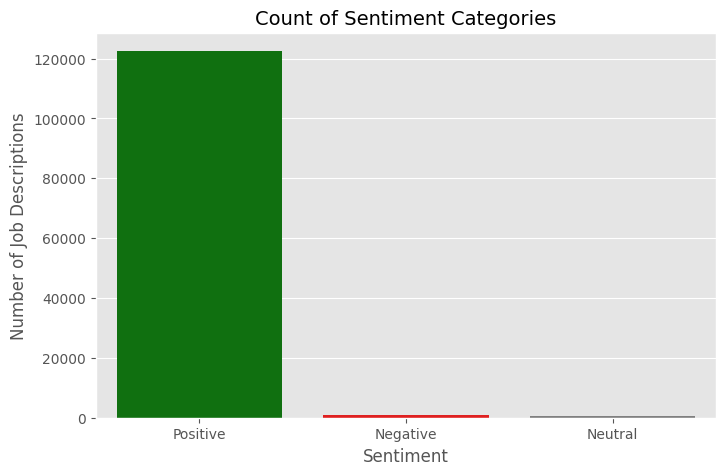

In [35]:
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'gray'])

# Customize the plot
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Job Descriptions", fontsize=12)
plt.title("Count of Sentiment Categories", fontsize=14)
plt.show()


In [36]:
def categorize_job(title):
    title = str(title).lower()
    if any(word in title for word in ['software', 'developer', 'engineer', 'data', 'it']):
        return 'IT'
    elif any(word in title for word in ['nurse', 'healthcare', 'doctor', 'therapist']):
        return 'Healthcare'
    elif any(word in title for word in ['finance', 'accountant', 'banking']):
        return 'Finance'
    elif any(word in title for word in ['marketing', 'social media', 'seo']):
        return 'Marketing'
    elif any(word in title for word in ['sales', 'business development']):
        return 'Sales'
    else:
        return 'Other'

df_cleaned['job_category'] = df_cleaned['title'].apply(categorize_job)


In [37]:
sentiment_by_category = df_cleaned.groupby(['job_category', 'sentiment_label']).size().unstack().fillna(0)
print(sentiment_by_category)  # Check data before visualization


sentiment_label  Negative  Neutral  Positive
job_category                                
Finance                 5        6      2018
Healthcare             36        7      5740
IT                    123      160     30594
Marketing               1        3      1897
Other                 647      300     74013
Sales                   7       16      8269


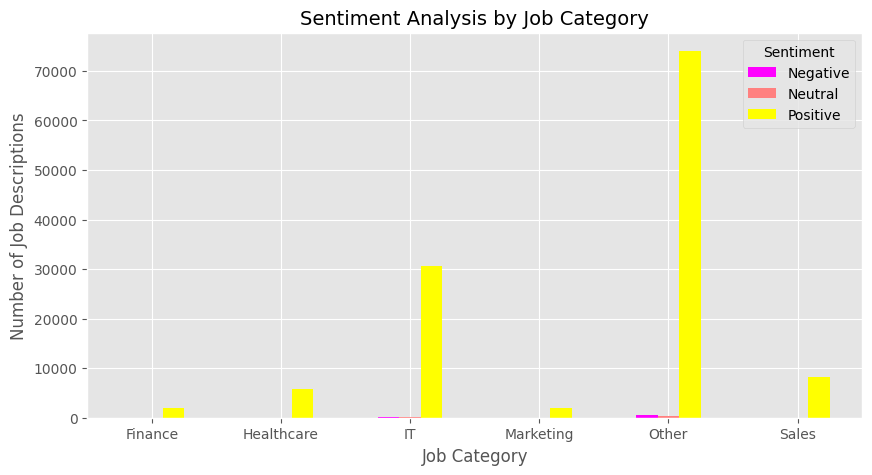

In [ ]:
# Plot grouped bar chart
sentiment_by_category.plot(kind='bar', figsize=(10, 5), colormap='spring')

# Customize plot
plt.xlabel("Job Category", fontsize=12)
plt.ylabel("Number of Job Descriptions", fontsize=12)
plt.title("Sentiment Analysis by Job Category", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", labels=['Negative', 'Neutral', 'Positive'])
plt.show()

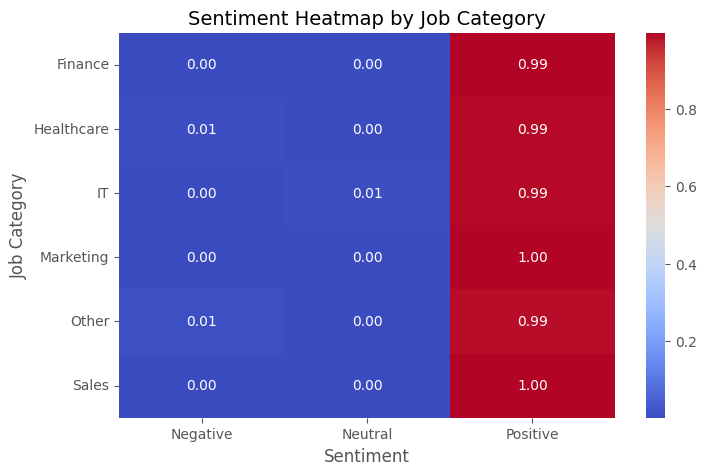

In [ ]:
# grouping by category and calculating total no of job description in each category then converting raw counts to percentage
sentiment_percentage = sentiment_by_category.div(sentiment_by_category.sum(axis=1), axis=0)

plt.figure(figsize=(8, 5))
sns.heatmap(sentiment_percentage, annot=True, cmap='coolwarm', fmt=".2f")

# Customize plot
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Job Category", fontsize=12)
plt.title("Sentiment Heatmap by Job Category", fontsize=14)
plt.show()